In [1]:
import numpy as np
from matplotlib import pyplot as plt

### [1] Data preparation

In [2]:
def make_blobs(distance=1, sigma=0.1, nA=2000, nB=2000):
    
    # define two centers for the two classes: class-A and class-B
    center_A = np.random.uniform(-10, 10, 2)
    theta = np.pi / 3
    displacement = np.array([distance*np.cos(theta), distance*np.sin(theta)])
    center_B = center_A + displacement
    
    # define a covariance matrix that the two classes share
    cov = sigma*np.array([[1, 0], [0, 1]])
    
    # sample data points from a multivariate normal distribution
    X_A = np.random.multivariate_normal(center_A, cov, nA)
    X_B = np.random.multivariate_normal(center_B, cov, nB)
    Y_A = np.zeros(nA, dtype=np.int) # 0 for class A
    Y_B = np.ones(nB, dtype=np.int) # 1 for class B
    X = np.append(X_A, X_B, axis=0)
    Y = np.append(Y_A, Y_B)
    
    return X, Y

In [3]:
nA = 1000
nB = 1000
X_sample, Y_sample = make_blobs(distance=1, sigma=0.05, nA=nA, nB=nB)

In [4]:
def scatter_plot(X, Y, title, alpha=0.2):
    color_class = ('b', 'r')
    f, ax = plt.subplots(1, figsize=(5, 5))
    index_A = np.where(Y==0)
    index_B = np.where(Y==1)
    plt.plot(X[index_A, 0], X[index_A, 1], '.', color=color_class[0], alpha=alpha)
    plt.plot(X[index_B, 0], X[index_B, 1], '.', color=color_class[1], alpha=alpha)
    plt.plot(np.mean(X[index_A, 0]), np.mean(X[index_A, 1]), '.', color=color_class[0], label='class A')
    plt.plot(np.mean(X[index_B, 0]), np.mean(X[index_B, 1]), '.', color=color_class[1], label='class B')
    plt.legend()
    plt.title(title + ' (N=%d)' %len(Y))
    plt.axis('equal')  
    return f, ax

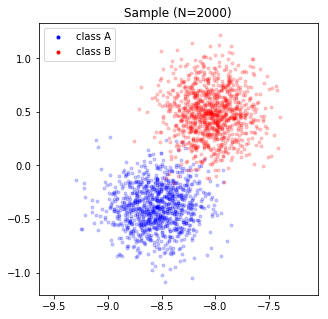

In [5]:
f, ax = scatter_plot(X_sample, Y_sample, 'Sample')
plt.show()

In [6]:
def train_test_split(X_sample, Y_sample, percent_test=30):
    n_sample = X_sample.shape[0]
    n_test = round(n_sample*percent_test/100)
    n_train = n_sample - n_test
    
    # random shuffle
    index = np.random.permutation(n_sample)
    X_sample = X_sample[index]
    Y_sample = Y_sample[index]

    index_test = np.random.choice(n_sample, n_test, replace=False)
    X_test = X_sample[index_test]
    Y_test = Y_sample[index_test]
    
    X_train = np.delete(X_sample, index_test, axis=0)
    Y_train = np.delete(Y_sample, index_test)
    
    return X_train, X_test, Y_train, Y_test

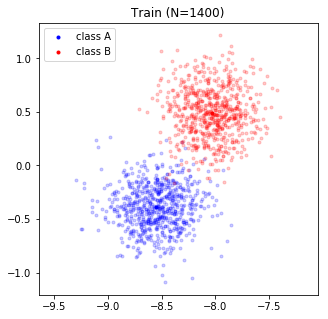

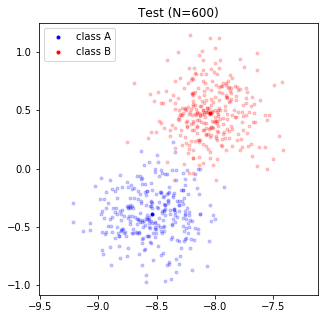

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sample, Y_sample)
n_train = len(Y_train)
n_test = len(Y_test)

f, ax = scatter_plot(X_train, Y_train, 'Train')
plt.show()
f, ax = scatter_plot(X_test, Y_test, 'Test')
plt.show()

### [2] Build a neural network as a python *class*
Show step-by-step figures for each function

In [64]:
class Perceptron(): 
    
    def __init__(self, beta, n_epoch):
        self.beta = beta
        self.n_epoch = n_epoch
        
    def initialize(self, dim):
        self.W = np.random.randn(dim)
        return self.W
    
    def bias_extend(self, X):
        bias = np.ones((X.shape[0], 1))
        X_ext = np.append(bias, X, axis=1)
        return X_ext
    
    def weighted_sum(self, X_ext, W):
        return np.matmul(X_ext, W)
    
    def activate(self, Z):
        output = Z # identity function
        return output 
    
    def predict(self, X):
        X_ext = self.bias_extend(X)
        Z = self.weighted_sum(X_ext, self.W)
        output = self.activate(Z)
        binary_output = np.where(output > 0, 1, 0)
        return binary_output
    
    def cost(self, output, Y):
        error = output - Y
        return 0.5*np.dot(error, error)
    
    def accuracy(self, binary_output, Y):
        return sum(binary_output == Y) / len(Y)
    
    def update(self, X, Y):
        X_ext = self.bias_extend(X)
        for epoch in range(self.n_epoch):
            Y_predict = self.predict(X)
            self.W += self.beta * np.matmul(X_ext.T, (Y - Y_predict))
         

### [3] Train the neural network and evaluate the result

In [65]:
# train: so simple :)
nn = Perceptron(beta=0.001, n_epoch=500)
nn.initialize(3)
nn.update(X_train, Y_train)

# evaluation
Y_train_predict = nn.predict(X_train)
Y_test_predict = nn.predict(X_test)
acc_train = nn.accuracy(Y_train_predict, Y_train)
acc_test = nn.accuracy(Y_test_predict, Y_test)

print('Train accuracy = %.3f' %acc_train)
print('Test accuracy = %.3f' %acc_test)
print('Final weight =', nn.W)

Train accuracy = 0.979
Test accuracy = 0.982
Final weight = [  3.01162799   0.46256554  30.91971275]


### [4] Modify the Perceptron class to show progress

In [66]:
class Perceptron(): 
    
    def __init__(self, beta, n_epoch):
        self.beta = beta
        self.n_epoch = n_epoch
        
    def initialize(self, dim):
        self.W = np.random.randn(dim)
        return self.W
    
    def bias_extend(self, X):
        bias = np.ones((X.shape[0], 1))
        X_ext = np.append(bias, X, axis=1)
        return X_ext
    
    def weighted_sum(self, X_ext, W):
        return np.matmul(X_ext, W)
    
    def activate(self, Z):
        output = Z # identity function
        return output 
    
    def predict(self, X):
        X_ext = self.bias_extend(X)
        Z = self.weighted_sum(X_ext, self.W)
        output = self.activate(Z)
        binary_output = np.where(output > 0, 1, 0)
        return binary_output
    
    def cost(self, output, Y):
        error = output - Y
        return 0.5*np.dot(error, error)
    
    def accuracy(self, binary_output, Y):
        return sum(binary_output == Y) / len(Y)
    
    def update(self, X, Y):
        X_ext = self.bias_extend(X)
        W_hist = [self.W]
        acc_hist = []
        
        for epoch in range(self.n_epoch):
            Y_predict = self.predict(X)
            self.W += self.beta * np.matmul(X_ext.T, (Y - Y_predict))
            W_hist = np.append(W_hist, [self.W], axis=0)
            acc_hist.append(self.accuracy(Y_predict, Y))
        
        f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6), sharex=True)
        ax1.plot(W_hist)
        ax2.plot(acc_hist)
        plt.show()
         

### [5] Visualize the result

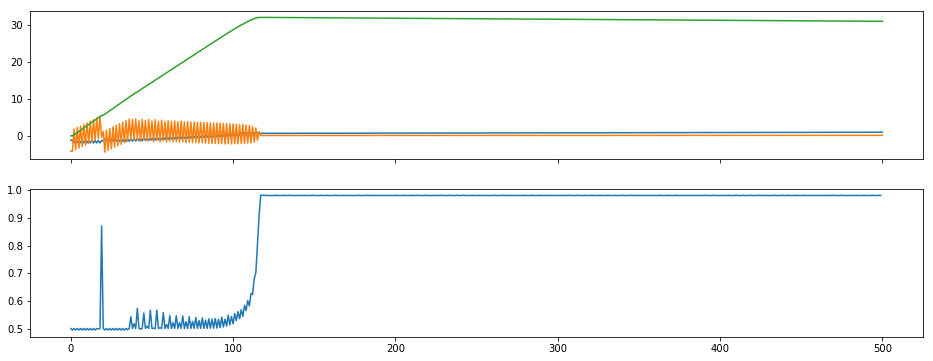

Train accuracy = 0.979
Test accuracy = 0.978
Final weight = [  1.06365206   0.22314884  31.1118511 ]


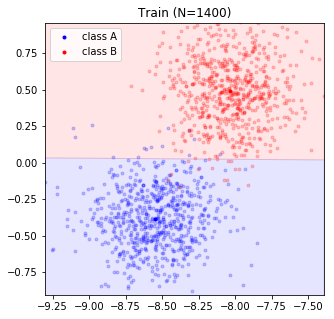

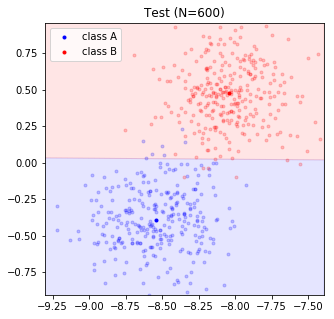

In [70]:
# train: so simple :)
nn = Perceptron(beta=0.001, n_epoch=500)
nn.initialize(3)
nn.update(X_train, Y_train)


# evaluation
Y_train_predict = nn.predict(X_train)
Y_test_predict = nn.predict(X_test)
acc_train = nn.accuracy(Y_train_predict, Y_train)
acc_test = nn.accuracy(Y_test_predict, Y_test)
print('Train accuracy = %.3f' %acc_train)
print('Test accuracy = %.3f' %acc_test)
print('Final weight =', nn.W)


# calculate a separation line slope and intercept
W = nn.W
slope = -W[1] / W[2]
intercept = -W[0] / W[2]
x1_min = min(X_train[:, 0])
x1_max = max(X_train[:, 0])
x2_min = min(X_train[:, 1])
x2_max = max(X_train[:, 1])


# Train set
f, ax = scatter_plot(X_train, Y_train, 'Train')
X1 = np.linspace(x1_min, x1_max, 100)
X2 = slope*X1 + intercept
plt.fill_between(X1, X2, X2-100, color='b', alpha=0.1)
plt.fill_between(X1, X2, X2+100, color='r', alpha=0.1)
plt.xlim(min(X1), max(X1))
plt.ylim(min(X2), max(X2))
plt.show()


# Test set
f, ax = scatter_plot(X_test, Y_test, 'Test')
plt.fill_between(X1, X2, X2-100, color='b', alpha=0.1)
plt.fill_between(X1, X2, X2+100, color='r', alpha=0.1)
plt.xlim(min(X1), max(X1))
plt.ylim(min(X2), max(X2))
plt.show()